<a href="https://colab.research.google.com/github/GreeshmaSappidi06/Sentiment-Analysis-of-Restaurant-Reviews/blob/main/Sentiment_Analysis_of_Restaurant_Review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing libraries
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#importing data
df=pd.read_csv("/content/drive/MyDrive/Restaurant_Reviews.tsv",delimiter="\t",quoting=3)

In [ ]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [ ]:
df.tail()


,Review,Liked
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0
999,"Then, as if I hadn't wasted enough of my life ...",0


In [ ]:
df.shape


(1000, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [ ]:
df.describe()

,Liked
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [ ]:
df['Length']=df['Review'].apply(len)
df.head()

,Review,Liked,Length
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59


In [ ]:
df[df['Length']==100]["Review"].iloc[0]

"Perhaps I caught them on an off night judging by the other reviews, but I'm not inspired to go back."

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import string
from nltk.corpus import stopwords

In [ ]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
[punc for punc in string.punctuation]

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

DATA PREPROCESSING

In [ ]:
def text_process(msg):
  nopunc=[char for char in msg if char not in string.punctuation]
  nopunc=''.join(nopunc)
  return ' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words('english')])

In [ ]:
df.head()

,Review,Liked,Length
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59


In [ ]:
df['Tokenized_Review']=df['Review'].apply(text_process)

In [ ]:
df.head()

,Review,Liked,Length,Tokenized_Review
0,Wow... Loved this place.,1,24,Wow Loved place
1,Crust is not good.,0,18,Crust good
2,Not tasty and the texture was just nasty.,0,41,tasty texture nasty
3,Stopped by during the late May bank holiday of...,1,87,Stopped late May bank holiday Rick Steve recom...
4,The selection on the menu was great and so wer...,1,59,selection menu great prices


In [ ]:
df.head(10)

,Review,Liked,Length,Tokenized_Review
0,Wow... Loved this place.,1,24,Wow Loved place
1,Crust is not good.,0,18,Crust good
2,Not tasty and the texture was just nasty.,0,41,tasty texture nasty
3,Stopped by during the late May bank holiday of...,1,87,Stopped late May bank holiday Rick Steve recom...
4,The selection on the menu was great and so wer...,1,59,selection menu great prices
5,Now I am getting angry and I want my damn pho.,0,46,getting angry want damn pho
6,Honeslty it didn't taste THAT fresh.),0,37,Honeslty didnt taste fresh
7,The potatoes were like rubber and you could te...,0,111,potatoes like rubber could tell made ahead tim...
8,The fries were great too.,1,25,fries great
9,A great touch.,1,14,great touch


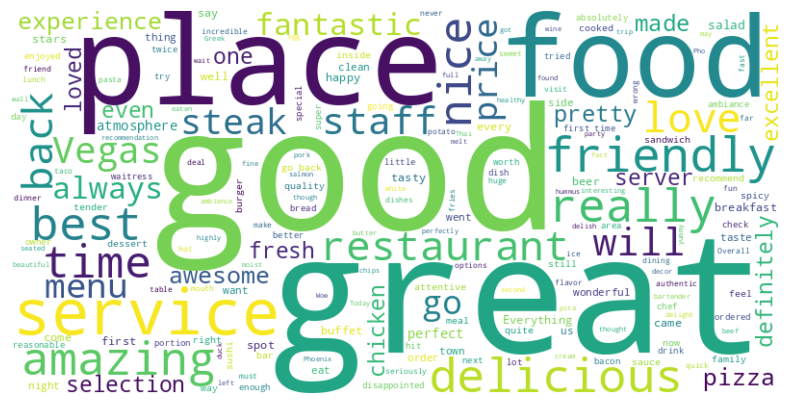

In [ ]:
#positive review
from wordcloud import WordCloud
import matplotlib.pyplot as plt
word_cloud=df.loc[df['Liked']==1,:]
text= ' '.join([text for text in word_cloud['Review']])
#Generate a WordCloud object
wordcloud=WordCloud(width=800,height=400,background_color='white').generate(text)
#Display the word cloud using Matplotlib
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


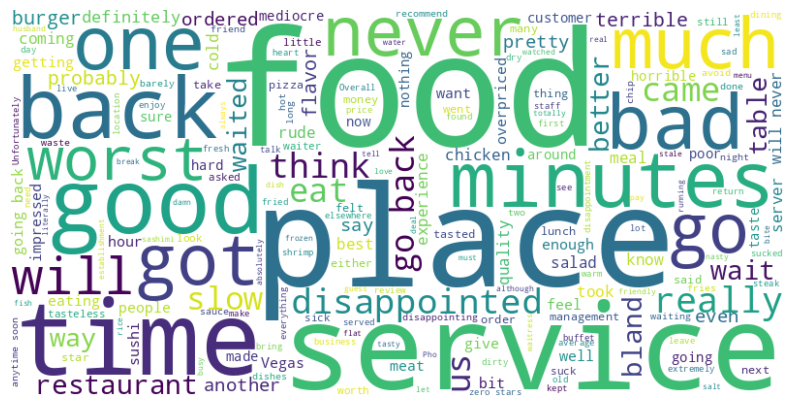

In [ ]:
#negative review
from wordcloud import WordCloud
import matplotlib.pyplot as plt
word_cloud=df.loc[df['Liked']==0,:]
text= ' '.join([text for text in word_cloud['Review']])
#Generate a WordCloud Object
wordcloud=WordCloud(width=800,height=400,background_color='white').generate(text)
#Display the word cloud using matplotlib
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


FEATURE ENGINEERING

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer


In [ ]:
vectorizer=CountVectorizer(max_df=0.9,min_df=10)
X=vectorizer.fit_transform(df['Tokenized_Review']).toarray()

In [ ]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

SPLTTING THE DATA INTO TRAINING AND TESTING


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df['Tokenized_Review'],df['Liked'],random_state=107,test_size=0.2)

In [ ]:
X_train.head()

675                        fantastic neighborhood gem
561                               two felt disgusting
535    excellent new restaurant experienced Frenchman
266                                service par either
199                                       worth drive
Name: Tokenized_Review, dtype: object

In [ ]:
train_vectorized=vectorizer.transform(X_train)
test_vectorized=vectorizer.transform(X_test)

In [ ]:
X_train_array=train_vectorized.toarray()
X_test_array=test_vectorized.toarray()

GAUSSIAN NAIVE BAYES


In [ ]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()

nb.fit(X_train_array,y_train)

y_train_preds_nb = nb.predict(X_train_array)
y_test_preds_nb=nb.predict(X_test_array)


In [ ]:
y_test_preds_nb

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1])

In [ ]:
y_test

906    0
24     1
706    1
958    0
355    1
      ..
657    1
754    0
839    1
495    0
804    1
Name: Liked, Length: 200, dtype: int64

In [ ]:
pd.DataFrame({"actual_y_value":y_test,"predicted_y_value":y_test_preds_nb})

,actual_y_value,predicted_y_value
906,0,0
24,1,0
706,1,1
958,0,0
355,1,1
...,...,...
657,1,1
754,0,0
839,1,0
495,0,0


In [ ]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,roc_auc_score,confusion_matrix,roc_curve,auc,classification_report

In [ ]:
def print_metrics(actual,predicted):
  print('Accuarcy score is {}'.format(accuracy_score(actual,predicted)))
  print('Precision score is {}'.format(precision_score(actual,predicted)))

  print('recall score is {}'.format(recall_score(actual,predicted)))
  print('f1 score is {}'.format(f1_score(actual,predicted)))
  print('roc auc score is {}'.format(roc_auc_score(actual,predicted)))
  print('Confusion matrix is {}'.format(confusion_matrix(actual,predicted)))
  print('Classification report is {}'.format(classification_report(actual,predicted)))

In [ ]:
#Evaluation of training model
print_metrics(y_train,y_train_preds_nb)


Accuarcy score is 0.76375
Precision score is 0.8403908794788274
recall score is 0.6482412060301508
f1 score is 0.7319148936170213
roc auc score is 0.7631753293832346
Confusion matrix is [[353  49]
 [140 258]]
Classification report is               precision    recall  f1-score   support

           0       0.72      0.88      0.79       402
           1       0.84      0.65      0.73       398

    accuracy                           0.76       800
   macro avg       0.78      0.76      0.76       800
weighted avg       0.78      0.76      0.76       800



In [ ]:
#Evaluation of testing model
print_metrics(y_test,y_test_preds_nb)


Accuarcy score is 0.725
Precision score is 0.8133333333333334
recall score is 0.5980392156862745
f1 score is 0.6892655367231638
roc auc score is 0.7275910364145659
Confusion matrix is [[84 14]
 [41 61]]
Classification report is               precision    recall  f1-score   support

           0       0.67      0.86      0.75        98
           1       0.81      0.60      0.69       102

    accuracy                           0.73       200
   macro avg       0.74      0.73      0.72       200
weighted avg       0.74      0.72      0.72       200



MULTINOMIAL NAIVE BAYES

In [ ]:
#Fitting naive bayes to the training set
from sklearn.naive_bayes import MultinomialNB

#Model Generation using Multinomial Naive Bayes

mnv=MultinomialNB()
mnv.fit(X_train_array,y_train)

y_train_preds_mnv = mnv.predict(X_train_array)
y_test_preds_mnv=mnv.predict(X_test_array)

In [ ]:
y_test_preds_mnv

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1])

In [ ]:
#Evaluation of training model
print_metrics(y_train,y_train_preds_mnv)

Accuarcy score is 0.77
Precision score is 0.8092485549132948
recall score is 0.7035175879396985
f1 score is 0.7526881720430108
roc auc score is 0.7696692417310432
Confusion matrix is [[336  66]
 [118 280]]
Classification report is               precision    recall  f1-score   support

           0       0.74      0.84      0.79       402
           1       0.81      0.70      0.75       398

    accuracy                           0.77       800
   macro avg       0.77      0.77      0.77       800
weighted avg       0.77      0.77      0.77       800



In [ ]:
#Evaluation of testing model
print_metrics(y_test,y_test_preds_mnv)

Accuarcy score is 0.745
Precision score is 0.7802197802197802
recall score is 0.696078431372549
f1 score is 0.7357512953367875
roc auc score is 0.7459983993597439
Confusion matrix is [[78 20]
 [31 71]]
Classification report is               precision    recall  f1-score   support

           0       0.72      0.80      0.75        98
           1       0.78      0.70      0.74       102

    accuracy                           0.74       200
   macro avg       0.75      0.75      0.74       200
weighted avg       0.75      0.74      0.74       200



In [ ]:
#Hyper parameter tuning the naive bayes classifier

best_accuracy = 0.0
alpha_val= 0.0

for i in np.arange(0.01,1.1,0.1):
  temp_classifier = MultinomialNB(alpha=i)
  temp_classifier.fit(X_train_array,y_train)
  temp_y_pred=temp_classifier.predict(X_test_array)
  score=accuracy_score(y_test,temp_y_pred)
  print('Accuracy score for alpha={} is: {}%'.format(round(i,1),round(score*100,2)))
  if score>best_accuracy:
    best_accuracy = score
    alpha_val = i

print("--------------------------------------")
print("The best accuracy is {}% with alpha value as {}".format(round(best_accuracy*100,2), round(alpha_val)))

Accuracy score for alpha=0.0 is: 75.5%
Accuracy score for alpha=0.1 is: 75.5%
Accuracy score for alpha=0.2 is: 75.0%
Accuracy score for alpha=0.3 is: 74.0%
Accuracy score for alpha=0.4 is: 74.5%
Accuracy score for alpha=0.5 is: 74.5%
Accuracy score for alpha=0.6 is: 74.5%
Accuracy score for alpha=0.7 is: 74.5%
Accuracy score for alpha=0.8 is: 74.5%
Accuracy score for alpha=0.9 is: 74.5%
Accuracy score for alpha=1.0 is: 74.5%
--------------------------------------
The best accuracy is 75.5% with alpha value as 0


LOGISTIC REGRESSION

In [ ]:
from sklearn import linear_model
classifier = linear_model.LogisticRegression(C=1.5)
classifier.fit(X_train_array, y_train)

# Predicting the Test set results
y_train_preds_LG = classifier.predict(X_train_array)
y_test_preds_LG = classifier.predict(X_test_array)


In [ ]:
#Evaluation of training model
print_metrics(y_train,y_train_preds_LG)

Accuarcy score is 0.795
Precision score is 0.8588957055214724
recall score is 0.7035175879396985
f1 score is 0.7734806629834255
roc auc score is 0.7945448636215905
Confusion matrix is [[356  46]
 [118 280]]
Classification report is               precision    recall  f1-score   support

           0       0.75      0.89      0.81       402
           1       0.86      0.70      0.77       398

    accuracy                           0.80       800
   macro avg       0.80      0.79      0.79       800
weighted avg       0.80      0.80      0.79       800



In [ ]:
#Evaluation of testing model
print_metrics(y_test,y_test_preds_LG)

Accuarcy score is 0.765
Precision score is 0.7894736842105263
recall score is 0.7352941176470589
f1 score is 0.7614213197969544
roc auc score is 0.7656062424969988
Confusion matrix is [[78 20]
 [27 75]]
Classification report is               precision    recall  f1-score   support

           0       0.74      0.80      0.77        98
           1       0.79      0.74      0.76       102

    accuracy                           0.77       200
   macro avg       0.77      0.77      0.76       200
weighted avg       0.77      0.77      0.76       200

